# Part B : News Article Classification

## Task 1: Data Collection and Preprocessing:
1. Collect a dataset of labeled news articles (sports, politics, technology etc).
2. Clean and preprocess the text data.
3. Handle missing data, if any, and ensure the text is ready for feature extraction.

In [3]:
# 1.Collect a dataset of labeled news articles (sports, politics, technology etc).

# Step 1: Load & Explore the Data
import pandas as pd

# Load the dataset
df = pd.read_csv('data_news.csv')

# Display shape and first few rows
print("Shape of dataset:", df.shape)
print(df.head())
print(df.info())
print(df['category'].value_counts())

Shape of dataset: (50000, 5)
   category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you wan

In [4]:
# 3.Handle missing data, if any, and ensure the text is ready for feature extraction.

# Step 2: Check for Missing Values
# Check for missing values
print(df.isnull().sum())

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64


In [5]:
# Drop rows where headline or short description or category is missing
df.dropna(subset=['headline', 'short_description', 'category'], inplace=True)

In [6]:
# Combine Headline and Description
df['text'] = df['headline'] + ' ' + df['short_description']

In [7]:
# 2.Clean and preprocess the text data.
# We'll clean the text by removing punctuation, stopwords, etc.

import re
import string

# Basic stopwords list
stopwords = set([
    'the', 'and', 'is', 'in', 'it', 'of', 'to', 'a', 'this', 'that',
    'for', 'on', 'with', 'as', 'are', 'was', 'but', 'be', 'at', 'by', 'an'
])

# Cleaning function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation & numbers
    words = text.split()
    words = [w for w in words if w not in stopwords]  # Remove stopwords
    return ' '.join(words) 

# Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

In [8]:
# Final Dataset for Modeling
df_final = df[['category', 'clean_text']]

# Show class distribution
print("Category distribution:\n", df_final['category'].value_counts())

# Display final cleaned data
df_final.head()

Category distribution:
 category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64


,category,clean_text
0,WELLNESS,miles days lessons learned resting part traini...
1,WELLNESS,talking yourself crazy or crazy helpful think ...
2,WELLNESS,crenezumab trial will gauge whether alzheimers...
3,WELLNESS,oh what difference she made if you want busy k...
4,WELLNESS,green superfoods first bad news soda bread cor...


## Task 2: Feature Extraction :

1. Use methods like TF-IDF , word embeddings (e.g., Word2Vec, GloVe), or
bag-of-words to convert text data into numerical features.
2. Perform exploratory data analysis (EDA) to understand the distribution of different
categories.

In [11]:
# 1.Use methods like TF-IDF , word embeddings (e.g., Word2Vec, GloVe), or bag-of-words to convert text data into numerical features.

# 1.1. Bag-of-Words (BoW) Vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Initialize BoW Vectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 words

# Fit and transform the clean text
X_bow = bow_vectorizer.fit_transform(df_final['clean_text'])

print("BoW shape:", X_bow.shape)


BoW shape: (50000, 5000)


In [12]:
# 1.2. TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform
X_tfidf = tfidf_vectorizer.fit_transform(df_final['clean_text'])

print("TF-IDF shape:", X_tfidf.shape)

TF-IDF shape: (50000, 5000)


In [13]:
# 1.3. Word2Vec
# OPTIONAL — only if you want embeddings
from gensim.models import Word2Vec

# Tokenize the text for Word2Vec
tokenized = df_final['clean_text'].apply(lambda x: x.split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2, workers=4)

# Access word vectors like this: w2v_model.wv['news']


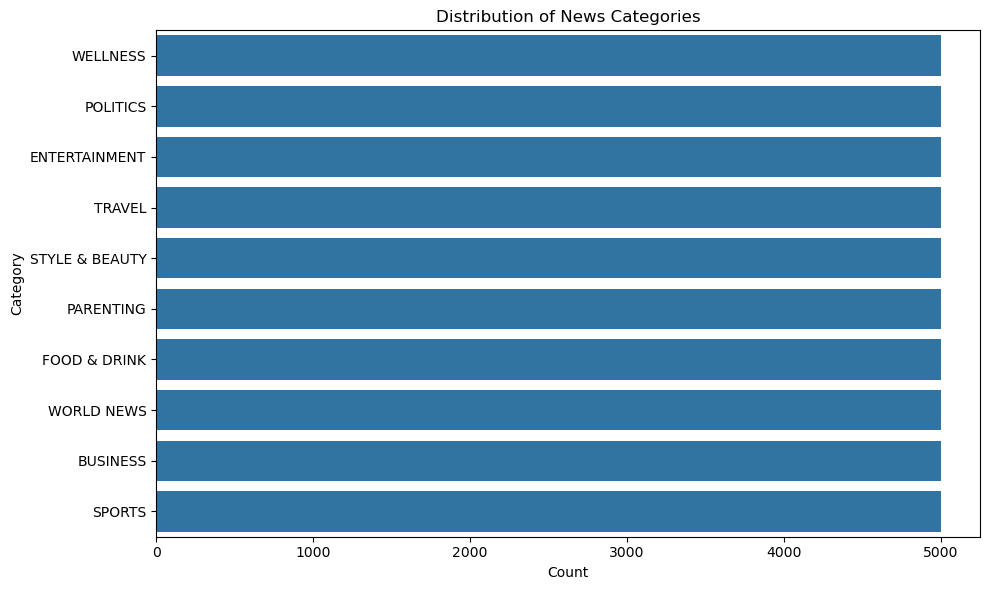

In [14]:
# 2.Perform exploratory data analysis (EDA) to understand the distribution of different categories.
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of article categories
plt.figure(figsize=(10,6))
sns.countplot(data=df_final, y='category', order=df_final['category'].value_counts().index)
plt.title('Distribution of News Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

1. TF-IDF Shape: (50,000, 5,000)
we have 50,000 news articles total.
Each article is represented as a vector of 5,000 features (words).
These 5,000 words are the most frequent or informative words selected from the entire dataset — not per category.
2. Balanced Categories:
From your bar plot, we can say:
that we have around 5,000 articles in each category (e.g., 5,000 in SPORTS, 5,000 in POLITICS, etc.).
and also the TF-IDF or BoW matrix uses the same 5,000 word features across all categories.

## Task 3. Model Development and Training :

1. Build classification models using algorithms like Logistic Regression, Naive Bayes,
Support Vector Machines (SVM).
2. Train the models on the preprocessed text data, tuning hyperparameters as necessary.
3. Use cross-validation to ensure robust evaluation of model performance.

In [18]:
from sklearn.model_selection import train_test_split
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
# 1. Build classification models using algorithms like Logistic Regression, Naive Bayes, Support Vector Machines (SVM).
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy:", lr_scores.mean())

# Naive Bayes
nb = MultinomialNB()
nb_scores = cross_val_score(nb, X_train, y_train, cv=5, scoring='accuracy')
print("Naive Bayes CV Accuracy:", nb_scores.mean())

# SVM (Linear)
svm = LinearSVC()
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("SVM CV Accuracy:", svm_scores.mean())

Logistic Regression CV Accuracy: 0.7855000000000001
Naive Bayes CV Accuracy: 0.7708999999999999
SVM CV Accuracy: 0.782475


In [20]:
# Fit final models
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)


,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [21]:
# 2. Train the models on the preprocessed text data, tuning hyperparameters as necessary.

#  2.1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define model and hyperparameter grid
lr = LogisticRegression(max_iter=1000)
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Grid search
grid_lr = GridSearchCV(lr, param_grid_lr, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_lr.fit(X_train, y_train)

# Best model
best_lr = grid_lr.best_estimator_
print("Best Logistic Regression Parameters:", grid_lr.best_params_)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the mu

Best Logistic Regression Parameters: {'C': 1, 'solver': 'lbfgs'}


In [22]:
 # 2.2. Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Define model and hyperparameter grid
nb = MultinomialNB()
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]
}

# Grid search
grid_nb = GridSearchCV(nb, param_grid_nb, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_nb.fit(X_train, y_train)

# Best model
best_nb = grid_nb.best_estimator_
print("Best Naive Bayes Parameters:", grid_nb.best_params_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Naive Bayes Parameters: {'alpha': 0.5}


In [23]:
# 2.3. Support Vector Machine (SVM)
from sklearn.svm import LinearSVC

# Define model and hyperparameter grid
svm = LinearSVC()
param_grid_svm = {
    'C': [0.1, 1, 10]
}

# Grid search
grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_svm.fit(X_train, y_train)

# Best model
best_svm = grid_svm.best_estimator_
print("Best SVM Parameters:", grid_svm.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best SVM Parameters: {'C': 0.1}


In [24]:
# 3.Use cross-validation to ensure robust evaluation of model performance.
# 3.1 Logistic Regression (Best from GridSearch)
from sklearn.model_selection import cross_val_score

cv_scores_lr = cross_val_score(best_lr, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression CV Accuracy Scores:", cv_scores_lr)
print("Mean CV Accuracy (Logistic Regression):", cv_scores_lr.mean())


Logistic Regression CV Accuracy Scores: [0.78925  0.78825  0.785    0.778875 0.786125]
Mean CV Accuracy (Logistic Regression): 0.7855000000000001


In [25]:
# 3.2 Naive Bayes
cv_scores_nb = cross_val_score(best_nb, X_train, y_train, cv=5, scoring='accuracy')
print("Naive Bayes CV Accuracy Scores:", cv_scores_nb)
print("Mean CV Accuracy (Naive Bayes):", cv_scores_nb.mean())

Naive Bayes CV Accuracy Scores: [0.776625 0.771875 0.767125 0.76975  0.767125]
Mean CV Accuracy (Naive Bayes): 0.7705


In [26]:
# 3.3 Support Vector Machine (SVM)
cv_scores_svm = cross_val_score(best_svm, X_train, y_train, cv=5, scoring='accuracy')
print("SVM CV Accuracy Scores:", cv_scores_svm)
print("Mean CV Accuracy (SVM):", cv_scores_svm.mean())


SVM CV Accuracy Scores: [0.7945   0.792375 0.7875   0.785125 0.791   ]
Mean CV Accuracy (SVM): 0.7901


## Task 4. Model Evaluation :
1. Evaluate the models using appropriate metrics.
2. Compare the performance of different models and select the best one for
classification.

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
# 1.Evaluate the models using appropriate metrics.
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    
    print(f"\n🧪 Evaluation Report for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


🧪 Evaluation Report for Logistic Regression
Accuracy: 0.7882
Precision: 0.7892948083048578
Recall: 0.7882
F1 Score: 0.7885040549666273

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.72      0.76      0.74      1000
 ENTERTAINMENT       0.76      0.78      0.77      1000
  FOOD & DRINK       0.83      0.86      0.84      1000
     PARENTING       0.77      0.75      0.76      1000
      POLITICS       0.75      0.74      0.75      1000
        SPORTS       0.87      0.87      0.87      1000
STYLE & BEAUTY       0.88      0.83      0.85      1000
        TRAVEL       0.78      0.78      0.78      1000
      WELLNESS       0.72      0.75      0.74      1000
    WORLD NEWS       0.80      0.77      0.78      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



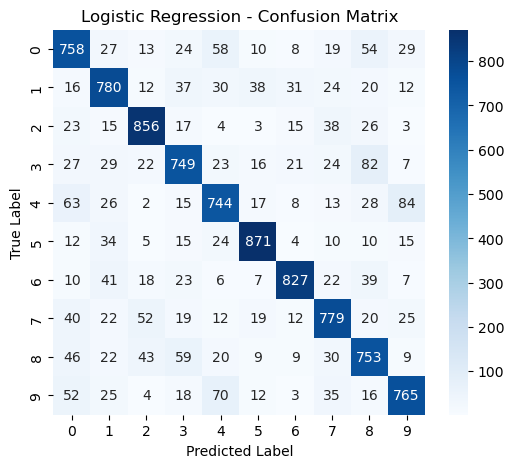

In [30]:
# Logistic Regression
evaluate_model(best_lr, X_test, y_test, "Logistic Regression")


🧪 Evaluation Report for Naive Bayes
Accuracy: 0.775
Precision: 0.7777572492870756
Recall: 0.775
F1 Score: 0.7756086822624995

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.74      0.70      0.72      1000
 ENTERTAINMENT       0.79      0.76      0.77      1000
  FOOD & DRINK       0.80      0.86      0.83      1000
     PARENTING       0.67      0.76      0.71      1000
      POLITICS       0.78      0.74      0.76      1000
        SPORTS       0.88      0.84      0.86      1000
STYLE & BEAUTY       0.87      0.81      0.84      1000
        TRAVEL       0.76      0.77      0.76      1000
      WELLNESS       0.70      0.74      0.72      1000
    WORLD NEWS       0.80      0.78      0.79      1000

      accuracy                           0.78     10000
     macro avg       0.78      0.78      0.78     10000
  weighted avg       0.78      0.78      0.78     10000



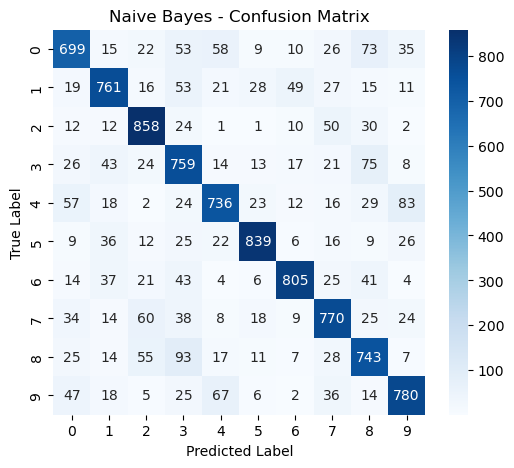

In [31]:
# Naive Bayes
evaluate_model(best_nb, X_test, y_test, "Naive Bayes")


🧪 Evaluation Report for Support Vector Machine
Accuracy: 0.7914
Precision: 0.7916470149873581
Recall: 0.7914
F1 Score: 0.7912455909780272

Classification Report:
                 precision    recall  f1-score   support

      BUSINESS       0.74      0.75      0.75      1000
 ENTERTAINMENT       0.78      0.77      0.78      1000
  FOOD & DRINK       0.82      0.87      0.84      1000
     PARENTING       0.76      0.77      0.77      1000
      POLITICS       0.78      0.72      0.75      1000
        SPORTS       0.86      0.89      0.87      1000
STYLE & BEAUTY       0.86      0.84      0.85      1000
        TRAVEL       0.79      0.78      0.78      1000
      WELLNESS       0.72      0.76      0.74      1000
    WORLD NEWS       0.80      0.77      0.78      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighted avg       0.79      0.79      0.79     10000



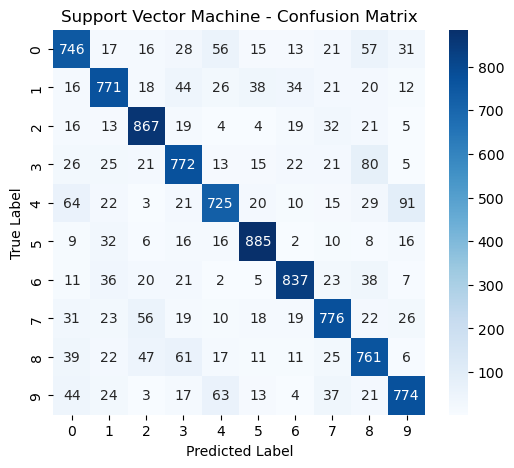

In [32]:
# SVM
evaluate_model(best_svm, X_test, y_test, "Support Vector Machine")

| Model                  | Accuracy   | Precision  | Recall     | F1-Score   |
| ---------------------- | ---------- | ---------- | ---------- | ---------- |
| Logistic Regression    | 0.7882     | 0.7893     | 0.7882     | 0.7885     |
| Naive Bayes            | 0.7750     | 0.7778     | 0.7750     | 0.7756     |
| Support Vector Machine | **0.7914** | **0.7916** | **0.7914** | **0.7912** |

SVM performed the best overall in terms of accuracy and all metrics, though only slightly better than Logistic Regression.
Naive Bayes had the lowest performance but was still very close—indicating all models are reasonably effective.
Class-wise performance shows:
SPORTS, FOOD & DRINK, and STYLE & BEAUTY had consistently high scores.
PARENTING and WELLNESS classes were more difficult, with slightly lower precision/recall across all models.

#### Best Model Selection:
Support Vector Machine (SVM) is selected as the best performing model due to:
Highest accuracy and F1-score.
Balanced performance across most categories.

In [61]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset
df = pd.read_csv("data_news.csv")

# Combine headline and short_description into a single feature column
df['text'] = df['headline'].fillna('') + ' ' + df['short_description'].fillna('')

# Drop rows with missing category or text
df.dropna(subset=['category', 'text'], inplace=True)

# Encode target labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['category'])

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply preprocessing
df['clean_text'] = df['text'].apply(preprocess_text)

# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
lr_model = LogisticRegression(max_iter=1000)
nb_model = MultinomialNB()
svm_model = LinearSVC()

# Train models
lr_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

# Cross-validation
print("Cross-validation Accuracy:")
print("Logistic Regression:", np.mean(cross_val_score(lr_model, X_train, y_train, cv=5)))
print("Naive Bayes:", np.mean(cross_val_score(nb_model, X_train, y_train, cv=5)))
print("SVM:", np.mean(cross_val_score(svm_model, X_train, y_train, cv=5)))

# Evaluation function
def evaluate_model(name, model):
    y_pred = model.predict(X_test)
    print(f"\n\U0001F9EA Evaluation Report for {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))

# Evaluate all models
evaluate_model("Logistic Regression", lr_model)
evaluate_model("Naive Bayes", nb_model)
evaluate_model("Support Vector Machine", svm_model)

# Save best model and vectorizer
joblib.dump(lr_model, "logistic_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(le, "label_encoder.pkl")

# Prediction function using saved models
def predict_news_category(article_text):
    model = joblib.load("logistic_model.pkl")
    vectorizer = joblib.load("tfidf_vectorizer.pkl")
    le = joblib.load("label_encoder.pkl")

    def preprocess(text):
        text = text.lower()
        text = re.sub(r'<[^>]+>', '', text)
        text = re.sub(r'[^a-z\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    cleaned = preprocess(article_text)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)[0]
    return le.inverse_transform([pred])[0]

# Example usage
if __name__ == "__main__":
    user_input = input("Enter the news article (headline + short description):\n")
    result = predict_news_category(user_input)
    print(f"\n\U0001F5C2️ Predicted Category: {result}")


Cross-validation Accuracy:
Logistic Regression: 0.785175
Naive Bayes: 0.7696
SVM: 0.7847500000000001

🧪 Evaluation Report for Logistic Regression
Accuracy: 0.7875
Precision: 0.7882998862354565
Recall: 0.7875
F1 Score: 0.7876357488535659

Classification Report:
                precision    recall  f1-score   support

      BUSINESS       0.73      0.76      0.74      1000
 ENTERTAINMENT       0.77      0.77      0.77      1000
  FOOD & DRINK       0.83      0.86      0.84      1000
     PARENTING       0.77      0.75      0.76      1000
      POLITICS       0.76      0.74      0.75      1000
        SPORTS       0.86      0.88      0.87      1000
STYLE & BEAUTY       0.88      0.82      0.85      1000
        TRAVEL       0.79      0.77      0.78      1000
      WELLNESS       0.72      0.75      0.73      1000
    WORLD NEWS       0.80      0.77      0.78      1000

      accuracy                           0.79     10000
     macro avg       0.79      0.79      0.79     10000
  weighte

Enter the news article (headline + short description):
 "India wins the ICC World Cup 2023 with a thrilling victory against Australia in the final match."



🗂️ Predicted Category: SPORTS
